# Stochastic analysis of COVID19 time series in "Baden-Württemberg"
data as of 10.06.2020 by https://sozialministerium.baden-wuerttemberg.de/de/gesundheit-pflege/gesundheitsschutz/infektionsschutz-hygiene/informationen-zu-coronavirus/lage-in-baden-wuerttemberg/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## extract values from selected list
variables names: *I: Infected; *T: Deceased

In [2]:
filename = 'Tabelle_Coronavirus-Faelle-BW.xlsx'
dfi = pd.read_excel(filename, sheet_name='Infizierte Coronavirus in BW', header=None)
dft = pd.read_excel(filename, sheet_name='Todesfälle Coronavirus in BW', header=None)

In [3]:
ctyI = np.nan_to_num(np.asarray(dfi))
ctyT = np.nan_to_num(np.asarray(dft))
# row 7: dates
# row 8 to 51: regions
    # row 18: Freiburg
    # row 38: Ravensburg
# row 52: sum

## plot regional data

In [63]:
index = 17
region = ctyI[index][0]
title = 'Corona cases in %s' % region

# calculate x data: dates
# currently: approximation where each month is approximated by 30 days.
xI = [el.day+el.month*30 if type(el) == datetime.datetime else False for el in ctyI[6]]
xT = [el.day+el.month*30 if type(el) == datetime.datetime else False for el in ctyT[6]]

# calculate trajectory points from data of given index
yI = [el if type(el) == int else False for el in ctyI[index]]
yT = [el if type(el) == int else False for el in ctyT[index]]

# remove first element of lists (column of regions, only str in these)
del xI[0]
del xT[0]
del yI[0]
del yT[0]

# Calculate new cases per day
dyIdt = []
for i in range(len(yI)):
    dyIdt.append(yI[i-1] - yI[i] if (yI[i-1] > 0 and i > 0) else False)
del dyIdt[0]
dyIdt.append(yI[-1])
    
# Calculate new deaths per day
dyTdt = []
for i in range(len(yT)):
    dyTdt.append(yT[i-1] - yT[i] if (yT[i-1] > 0 and i > 0) else False)
del dyTdt[0]
dyTdt.append(yT[-1])

# Checking for mistakes
print('I1:', len(xI) == len(yI))
print('T1:', len(xT) == len(yT))
print('dIdt:', len(xI) == len(dyIdt))
print('dTdt:', len(xT) == len(dyTdt))
checksum = 0
for el in dyIdt:
    checksum += el
print("checksum I:", checksum == yI[0])
checksum = 0
for el in dyTdt:
    checksum += el
print("checksum T:", checksum == yT[0])

I1: True
T1: True
dIdt: True
dTdt: True
checksum I: True
checksum T: True


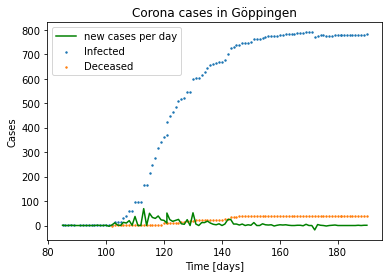

In [64]:
# Plot infected, deceased and new cases per day
plt.scatter(xI, yI, label='Infected', s=2)
plt.scatter(xT, yT, label='Deceased', s=2)
plt.plot(xI, dyIdt, label='new cases per day', c='g')
plt.xlabel('Time [days]')
plt.ylabel('Cases')
plt.title(title)
plt.legend(loc='upper left')
plt.savefig('%sCases.png' % region)

## plot total data

In [65]:
# calculate total sum
yI_total = [el for el in ctyI[51]]
yT_total = [el for el in ctyT[51]]

# remove first element of lists (column of regions, only str in these)
del yI_total[0]
del yT_total[0]

# Calculate new cases per day
dyI_totaldt = []
for i in range(len(yI_total)):
    dyI_totaldt.append(yI_total[i-1] - yI_total[i] if (yI_total[i-1] > 0 and i > 0) else False)
del dyI_totaldt[0]
dyI_totaldt.append(yI_total[-1])
    
# Calculate new deaths per day
dyT_totaldt = []
for i in range(len(yT)):
    dyT_totaldt.append(yT_total[i-1] - yT_total[i] if (yT_total[i-1] > 0 and i > 0) else False)
del dyT_totaldt[0]
dyT_totaldt.append(yT_total[-1])
    
# Checking for mistakes
print('I2:', len(xI) == len(yI_total))
print('T2:', len(xT) == len(yT_total))
print('dI_totaldt:', len(xI) == len(dyI_totaldt))
print('dT_totaldt:', len(xT) == len(dyT_totaldt))
checksum = 0
for el in dyI_totaldt:
    checksum += el
print("checksum I:", checksum == yI_total[0])    
checksum = 0
for el in dyT_totaldt:
    checksum += el
print("checksum T:", checksum == yT_total[0])

I2: True
T2: True
dI_totaldt: True
dT_totaldt: True
checksum I: True
checksum T: True


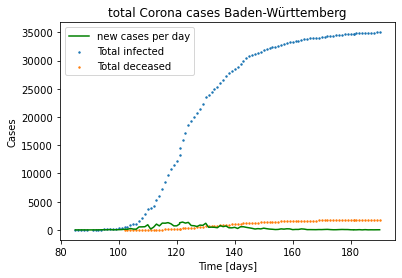

In [67]:
# Plot infected, deceased and new cases per day
plt.scatter(xI, yI_total, label='Total infected', s=2)
plt.scatter(xT, yT_total, label='Total deceased', s=2)
plt.plot(xI, dyI_totaldt, label='new cases per day', c='g')
plt.xlabel('Time [days]')
plt.ylabel('Cases')
plt.title('total Corona cases Baden-Württemberg')
plt.legend(loc='upper left')
plt.savefig('BWCases.png')